In [1]:
# Use SVG as the output format for notebooks.
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("svg")

import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = [10, 8]

(sec_guide_testing_a_dinf_model)=
# Testing a Dinf model

This page explains how to test a Dinf model.
See the [](sec_guide_creating_a_dinf_model) page
for how to write a model file.

## Dinf model files

When Dinf reads a model file (a `.py` file), it looks for a `dinf_model`
variable which must be an instance of the {class}`.DinfModel` class.
This object contains all the information needed to train a discriminator
network.

## Checking a model file

The Dinf command line interface can be used to do basic checks of the model.

```
dinf check examples/bottleneck/model.py
```

This will sample parameters from the prior distribution,
call the `generator_func` and `target_func` functions,
and confirm that their output matches the specified `feature_shape`.
If the model is a simulation-only model (i.e. the `target_func` is `None`),
then the parameters will be checked to ensure they each have a `truth` value.

## Visualising feature matrices

To get some intuition about the features given to the discriminator,
we can use `dinf-plot` with the `features` subcommand.
This samples a feature using the generator (with parameter values drawn
from the prior), and plots the result as a heatmap.
See [](sec_guide_features) for how to interpret feature matrices.

```
dinf-plot features --seed 1 examples/bottleneck/model.py
```

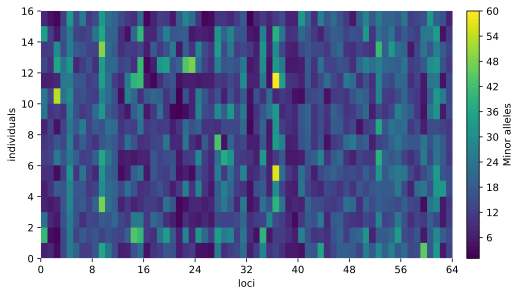

In [2]:
import dinf.plot

dinf.plot.main(
    "features -S 1 ../../examples/bottleneck/model.py".split()
)

## Training a discriminator

As an additional check of the model, it's useful to train a discriminator
with a modest number of replicates to confirm that the discriminator
can learn from the training data. We'll use `dinf` with
the `train` subcommand to train the model for 10 epochs (i.e. 10 full
passes over the training data). Note that short options are available
(e.g. `-S` for `--seed`), but the documentation uses long options for clarity.

```
dinf train \
    --seed 1 \
    --epochs 10 \
    --training-replicates 1000 \
    --test-replicates 1000 \
    examples/bottleneck/model.py \
    /tmp/discriminator.nn
```

In [3]:
import dinf.cli
import pathlib

pathlib.Path("/tmp/discriminator.nn").unlink(missing_ok=True)

dinf.cli.main(
    """
    train
        --seed 1
        --epochs 10
        --training-replicates 1000
        --test-replicates 1000
        ../../examples/bottleneck/model.py
        /tmp/discriminator.nn
    """.split()
)

[epoch 1|1000] train loss 0.4761, accuracy 0.7700

; test loss 2.5458, accuracy 0.4640


[epoch 2|1000] train loss 0.2615, accuracy 0.8980

; test loss 1.2306, accuracy 0.4770


[epoch 3|1000] train loss 0.2062, accuracy 0.9390

; test loss 1.2115, accuracy 0.4920


[epoch 4|1000] train loss 0.1613, accuracy 0.9600

; test loss 1.0080, accuracy 0.5260


[epoch 5|1000] train loss 0.1509, accuracy 0.9560

; test loss 0.5266, accuracy 0.6580


[epoch 6|1000] train loss 0.1168, accuracy 0.9740

; test loss 0.6150, accuracy 0.6310


[epoch 7|1000] train loss 0.0937, accuracy 0.9830

; test loss 0.5054, accuracy 0.7010


[epoch 8|1000] train loss 0.0798, accuracy 0.9840

; test loss 0.4782, accuracy 0.7170


[epoch 9|1000] train loss 0.0605, accuracy 0.9960

; test loss 0.4132, accuracy 0.7630


[epoch 10|1000] train loss 0.0504, accuracy 0.9960

; test loss 0.4485, accuracy 0.7370


Msprime simulations are quite fast, and on an 8-core i7-8665U laptop with
CPU-only training, this completes in about 40 seconds.
Loss and accuracy metrics are printed to the console by default,
but they can also be plotted using `dinf-plot` with the `metrics` subcommand.

```
dinf-plot metrics /tmp/discriminator.nn
```

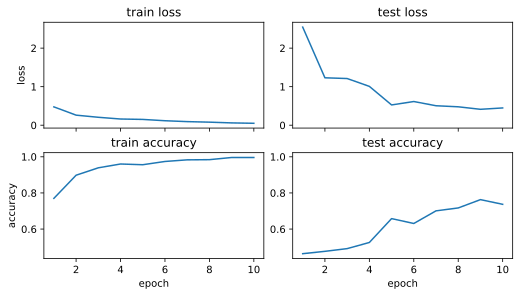

In [4]:
import dinf.plot

dinf.plot.main(
    """
    metrics /tmp/discriminator.nn
    """.split()
)

The plot shows that the test loss is decreasing over time, and the
test accuracy is increasing. This suggests that the discriminator is capable
of learning from the model.
To obtain more impressive accuracy, additional replicates will be needed.
Other ways to improve the accuracy are discussed on the
[](sec_guide_accuracy) page.